In [4]:
pip install searchtweets-v2


  Obtaining dependency information for searchtweets-v2 from https://files.pythonhosted.org/packages/1a/5c/13dc2c33acc2f05422bdddd374da53c91fee97a241501a8e334800bab600/searchtweets_v2-1.1.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pyyaml

Note: you may need to restart the kernel to use updated packages.


In [97]:
import re
import searchtweets as tw, pandas as pd
import matplotlib.pyplot as plt #For graph plotting
from wordcloud import STOPWORDS #To define stopWords

In [98]:
#Initialize the API
search_args = tw.load_credentials("search_tweets_v2.yaml",
                                     yaml_key="search_tweets_v2",
                                     env_overwrite=False)

In [103]:
#query that will pull will pullthe tweets with the stated parameters from twitter
query_before = tw.gen_request_parameters(
    query ='("Donald Trump" OR #DonaldTrump) -is:retweet -is:reply lang:en',
    results_per_call=100,
    start_time = "2024-07-12", 
    end_time = "2024-07-13",
    tweet_fields="id,created_at,text,author_id,public_metrics",
    granularity=None
)

query_after = tw.gen_request_parameters(
    query ='("Donald Trump" OR #DonaldTrump) -is:retweet -is:reply lang:en',
    results_per_call=100,
    start_time = "2024-07-14", 
    end_time = "2024-07-17",
    tweet_fields="id,created_at,text,author_id,public_metrics",
    granularity=None
)

In [104]:
#Just to ensure it works
print(query_before)
print(query_after)

{"query":"(\"Donald Trump\" OR #DonaldTrump) -is:retweet -is:reply lang:en","start_time":"2024-07-12T00:00:00Z","end_time":"2024-07-13T00:00:00Z","max_results":100,"tweet.fields":"id,created_at,text,author_id,public_metrics"}
{"query":"(\"Donald Trump\" OR #DonaldTrump) -is:retweet -is:reply lang:en","start_time":"2024-07-14T00:00:00Z","end_time":"2024-07-17T00:00:00Z","max_results":100,"tweet.fields":"id,created_at,text,author_id,public_metrics"}


In [105]:
#Implementing the Query
tweets_before = tw.collect_results(
    query_before,
    max_tweets=1951,
    #passing the credentials
    result_stream_args=search_args
)
tweets_after = tw.collect_results(
    query_after,
    max_tweets=1951,
    #passing the credentials
    result_stream_args=search_args
)

In [112]:
#saving data into different data frames
df_tweets_before = pd.DataFrame(tweets_before)
df_tweets_after = pd.DataFrame(tweets_after)

In [262]:
#pulling needed data from the tweetd field for analysis
data_frames = []
for tweet in tweets_before:
    for data in tweet['data']:
        # Extract public metrics
        metrics = data['public_metrics']
        # Create a dictionary with the desired fields
        tweet_data = {
            'id': data['id'],
            'created_at': data['created_at'],
            'text': data['text'],
            'retweet_count': metrics['retweet_count'],
            'reply_count': metrics['reply_count'],
            'like_count': metrics['like_count'],
            'quote_count': metrics['quote_count'],
            'bookmark_count': metrics.get('bookmark_count', 0),  # Use get to handle missing keys
            'impression_count': metrics.get('impression_count', 0)
        }
        # Append the tweet data dictionary to the list
        data_frames.append(tweet_data)

# Create a DataFrame from the list of dictionaries
df_tweets_before = pd.DataFrame(data_frames)


data_frames = []
for tweet in tweets_after:
    for data in tweet['data']:
        # Extract public metrics
        metrics = data['public_metrics']
        # Create a dictionary with the desired fields
        tweet_data = {
            'id': data['id'],
            'created_at': data['created_at'],
            'text': data['text'],
            'retweet_count': metrics['retweet_count'],
            'reply_count': metrics['reply_count'],
            'like_count': metrics['like_count'],
            'quote_count': metrics['quote_count'],
            'bookmark_count': metrics.get('bookmark_count', 0),  # Use get to handle missing keys
            'impression_count': metrics.get('impression_count', 0)
        }
        # Append the tweet data dictionary to the list
        data_frames.append(tweet_data)

# Create a DataFrame from the list of dictionaries
df_tweets_after = pd.DataFrame(data_frames)



In [116]:
#merging the tweets into one data frame
df_tweets = pd.concat([df_tweets_before, df_tweets_after], ignore_index=True)


In [117]:
#saving it to a CSV file for storing and later acess
df_tweets.to_csv("dJT_TWEETS.csv")

df_tweets = pd.read_csv("dJT_TWEETS.csv")

In [118]:
#checking the info on the dataframe
df_tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3991 non-null   int64 
 1   id                3991 non-null   int64 
 2   created_at        3991 non-null   object
 3   text              3991 non-null   object
 4   retweet_count     3991 non-null   int64 
 5   reply_count       3991 non-null   int64 
 6   like_count        3991 non-null   int64 
 7   quote_count       3991 non-null   int64 
 8   bookmark_count    3991 non-null   int64 
 9   impression_count  3991 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 311.9+ KB


In [119]:
#describing the dataframe
df_tweets.describe()

,Unnamed: 0,id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count
count,3991.000000,3.991000e+03,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3.991000e+03
mean,1995.000000,1.812626e+18,45.716612,27.503132,215.409672,3.928589,5.252318,1.874011e+04
std,1152.246791,7.278763e+14,548.844661,419.166784,2592.325282,58.291585,89.205110,3.514372e+05
min,0.000000,1.811881e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,997.500000,1.811898e+18,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01
50%,1995.000000,1.813345e+18,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
75%,2992.500000,1.813353e+18,1.000000,1.000000,2.000000,0.000000,0.000000,1.580000e+02
max,3990.000000,1.813363e+18,21616.000000,20687.000000,103741.000000,2442.000000,3930.000000,1.852066e+07


In [211]:
#Cleaning the tweets to eliminate unwanted characters
df_tweets['clean_text'] = pd.Series(dtype=str)

for row in range(0, len(df_tweets)):
    #Create the right regex expression here
    stripped = re.sub(r'[\b@][A-Za-z0-9_]+', "", df_tweets['text'][row])
    stripped= re.sub(r'[^\w\s]','',stripped)
    stripped= re.sub(r'\bRT ','',stripped)
    stripped = re.sub('[0-9]+[a-z]*', ' ', stripped)
    stripped = re.sub(r"http\S+|www\S+|https\S+", ' ', stripped,flags = re.MULTILINE)
    df_tweets['clean_text'][row] = stripped

C:\Users\Sodne\AppData\Local\Temp\ipykernel_9488\2068722986.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [212]:
df_tweets.head(10)

,Unnamed: 0,id,created_at,text,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,clean_text,text_stemmed_porter,text_stemmed_lancaster,date,sentiment_vader,nrc_sentiments,overall_sentiments,nrclex_sentiments
0,0,1811913427561959473,2024-07-12 23:59:59+00:00,They are calling Donald Trump authoritarian ca...,0,0,0,0,0,13,They are calling Donald Trump authoritarian ca...,calling donald trump authoritarian capture oh ...,calling donald trump authoritarian capture oh ...,2024-07-12,"(0.0, 1.0, 0.0, 0.0, Neutral)","{'surprise': 4, 'negative': 1}",Neutral,"{'surprise': 4, 'negative': 1}"
1,1,1811913417718112283,2024-07-12 23:59:57+00:00,Biden’s Back. \n\nFuck Donald Trump.,0,0,1,0,0,30,Bidens Back \n\nFuck Donald Trump,bidens back fuck donald trump,bidens back fuck donald trump,2024-07-12,"(0.467, 0.533, 0.0, -0.5423, Negative)",{'surprise': 1},Negative,{'surprise': 1}
2,2,1811913408268370247,2024-07-12 23:59:54+00:00,I thought Mike Pence was Vice President for Do...,0,0,4,0,0,61,I thought Mike Pence was Vice President for Do...,thought mike pence vice president donald trump...,thought mike pence vice president donald trump...,2024-07-12,"(0.093, 0.838, 0.069, -0.2023, Negative)","{'anticipation': 5, 'negative': 3, 'positive':...",Negative,"{'anticipation': 5, 'negative': 3, 'positive':..."
3,3,1811913396746346771,2024-07-12 23:59:52+00:00,💙🕊️🗽🫡 I found this on NewsBreak: Donald Trump ...,0,0,0,0,0,2,I found this on NewsBreak Donald Trump wants ...,found newsbreak donald trump wants reinstate s...,found newsbreak donald trump wants reinstate s...,2024-07-12,"(0.0, 0.877, 0.123, 0.2732, Positive)","{'joy': 1, 'positive': 3, 'trust': 3, 'surpris...",Positive,"{'joy': 1, 'positive': 3, 'trust': 3, 'surpris..."
4,4,1811913392875323412,2024-07-12 23:59:51+00:00,If you ask whether Donald Trump is the right p...,0,0,0,0,0,7,If you ask whether Donald Trump is the right p...,ask whether donald trump right person presiden...,ask whether donald trump right person presiden...,2024-07-12,"(0.061, 0.641, 0.298, 0.8176, Positive)","{'surprise': 2, 'positive': 3, 'trust': 3}",Positive,"{'surprise': 2, 'positive': 3, 'trust': 3}"
5,5,1811913386554196037,2024-07-12 23:59:49+00:00,You are pedophile enabler. \n\nFor the MAGA i...,6,5,14,0,0,346,You are pedophile enabler \n\nFor the MAGA in...,pedophile enabler maga backrow circled donald ...,pedophile enabler maga backrow circled donald ...,2024-07-12,"(0.0, 0.842, 0.158, 0.4588, Positive)",{},Positive,{}
6,6,1811913381919752251,2024-07-12 23:59:48+00:00,"Musk donates to group working to elect Trump, ...",0,0,2,0,0,84,Musk donates to group working to elect Trump B...,musk donates group working elect trump bloombe...,musk donates group working elect trump bloombe...,2024-07-12,"(0.0, 0.939, 0.061, 0.296, Positive)","{'positive': 5, 'trust': 3, 'surprise': 2}",Positive,"{'positive': 5, 'trust': 3, 'surprise': 2}"
7,7,1811913348155392417,2024-07-12 23:59:40+00:00,WOW just like election denier and Loser Donald...,0,0,0,0,0,9,WOW just like election denier and Loser Donald...,wow election denier loser donald trump asking ...,wow election denier loser donald trump asking ...,2024-07-12,"(0.306, 0.525, 0.168, -0.5773, Negative)","{'surprise': 2, 'trust': 2, 'negative': 3, 'sa...",Negative,"{'surprise': 2, 'trust': 2, 'negative': 3, 'sa..."
8,8,1811913339607617830,2024-07-12 23:59:38+00:00,"Biden: Unlike Donald Trump, I don't work for b...",5130,1866,19508,293,291,962975,Biden Unlike Donald Trump I dont work for big ...,biden unlike donald trump dont work big oil do...,biden unlike donald trump dont work big oil do...,2024-07-12,"(0.0, 1.0, 0.0, 0.0, Neutral)","{'surprise': 1, 'anger': 1, 'fear': 1, 'negati...",Neutral,"{'surprise': 1, 'anger': 1, 'fear': 1, 'negati..."
9,9,1811913324369756598,2024-07-12 23:59:34+00:00,President Biden on NATO vs. Donald Trump on NA...,0,0,1,0,0,21,President Biden on NATO vs Donald Trump on NAT...,president biden nato vs donald trump nato nato...,pr

In [267]:
#Define the stop words 
stopwords = set(STOPWORDS
                )
#Create the function that removes the words
def clean_text(input_txt):
    words = input_txt.lower().split()

    #Creates a list of words not classified as stopwords
    nonstop_words = [word for word in words if word not in stopwords]

    #Turns the list back into a text
    nonstop_text = " ".join(nonstop_words)

    #Returns the text
    return nonstop_text

#Implement the function using the lambda method
df_tweets["clean_text"] = df_tweets["clean_text"].apply(lambda s: clean_text(s))

In [220]:
from nltk import PorterStemmer
porter = PorterStemmer()

df_tweets['text_stemmed_porter'] = pd.Series(dtype= str)

for row in range(0, len(df_tweets)):
    df_tweets['text_stemmed_porter'][row] = porter.stem(df_tweets['clean_text'][row])

C:\Users\Sodne\AppData\Local\Temp\ipykernel_9488\814070823.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
#pulling out the date from create_at
df_tweets['created_at']=pd.to_datetime(df_tweets['created_at'])
df_tweets['date'] = df_tweets['created_at'].dt.date
df_tweets.head()

,Unnamed: 0,id,created_at,text,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,clean_text,text_stemmed_porter,date,sentiment_vader,overall_sentiments,nrclex_sentiments
0,0,1811913427561959473,2024-07-12 23:59:59+00:00,They are calling Donald Trump authoritarian ca...,0,0,0,0,0,13,calling donald trump authoritarian capture oh ...,calling donald trump authoritarian capture oh ...,2024-07-12,"(0.0, 1.0, 0.0, 0.0, Neutral)",Neutral,"{'surprise': 4, 'negative': 1}"
1,1,1811913417718112283,2024-07-12 23:59:57+00:00,Biden’s Back. \n\nFuck Donald Trump.,0,0,1,0,0,30,bidens back fuck donald trump,bidens back fuck donald trump,2024-07-12,"(0.467, 0.533, 0.0, -0.5423, Negative)",Negative,{'surprise': 1}
2,2,1811913408268370247,2024-07-12 23:59:54+00:00,I thought Mike Pence was Vice President for Do...,0,0,4,0,0,61,thought mike pence vice president donald trump...,thought mike pence vice president donald trump...,2024-07-12,"(0.093, 0.838, 0.069, -0.2023, Negative)",Negative,"{'anticipation': 5, 'negative': 3, 'positive':..."
3,3,1811913396746346771,2024-07-12 23:59:52+00:00,💙🕊️🗽🫡 I found this on NewsBreak: Donald Trump ...,0,0,0,0,0,2,found newsbreak donald trump wants reinstate s...,found newsbreak donald trump wants reinstate s...,2024-07-12,"(0.0, 0.87, 0.13, 0.2732, Positive)",Positive,"{'joy': 1, 'positive': 3, 'trust': 3, 'surpris..."
4,4,1811913392875323412,2024-07-12 23:59:51+00:00,If you ask whether Donald Trump is the right p...,0,0,0,0,0,7,ask whether donald trump right person presiden...,ask whether donald trump right person presiden...,2024-07-12,"(0.063, 0.63, 0.307, 0.8176, Positive)",Positive,"{'surprise': 2, 'positive': 3, 'trust': 3}"


In [222]:
#Import package
from sklearn.feature_extraction.text import CountVectorizer

#Create the count Vectorizer and Implement it on specific dataset
vect = CountVectorizer()
vects = vect.fit_transform(df_tweets.text_stemmed_porter)

tdn = pd.DataFrame(vects.todense())

#Getting the names of the words - for a clearer matrix
tdn.columns = vect.get_feature_names_out()


term_document_matrix = tdn.T

#collecting the count of each word
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

<Axes: >

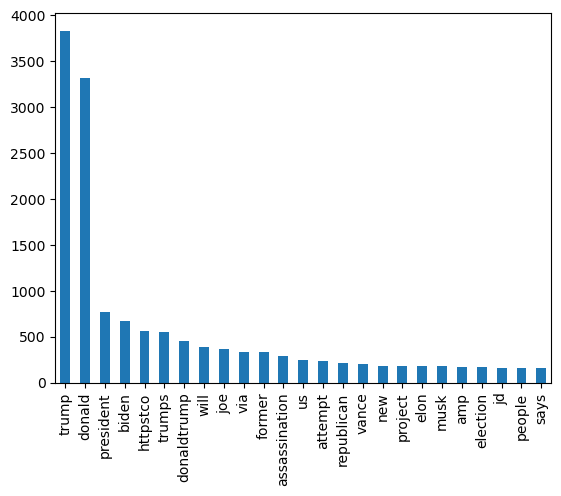

In [127]:
#Plot the most used 25 words
tdm_top25 = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25]
tdm_top25['total_count'].plot.bar()

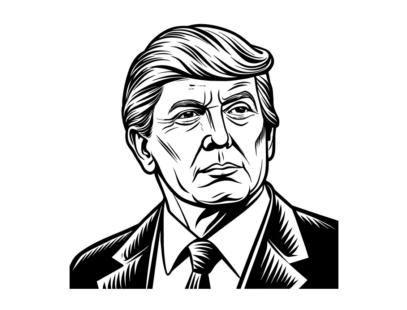

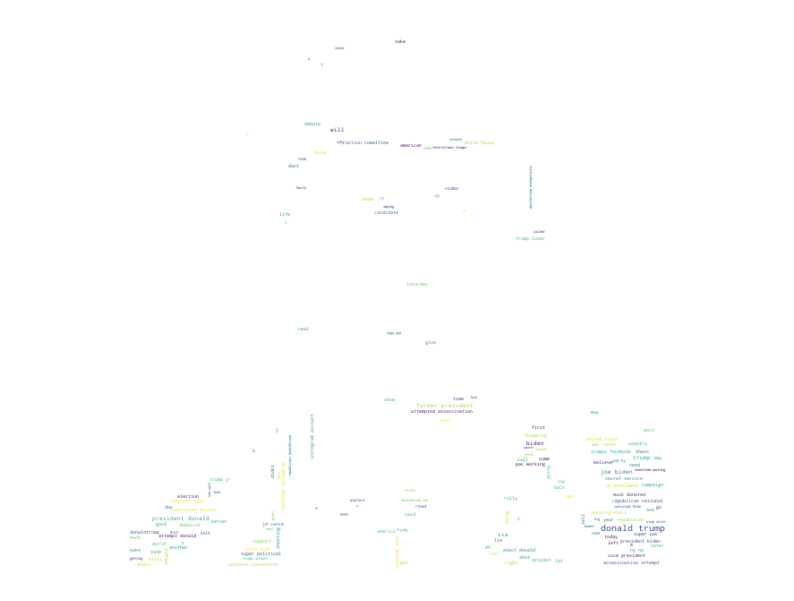

In [242]:
import numpy as np
from PIL import Image
image = np.array(Image.open('donald.png'))

# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df_tweets['text_stemmed_porter'].tolist()
tweets_long_string = " ".join(tweets_long_string)
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(5) # set width
fig.set_figheight(5) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white',mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)  # set width
fig.set_figheight(10)  # set height

plt.imshow(twitter_wc.recolor(random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

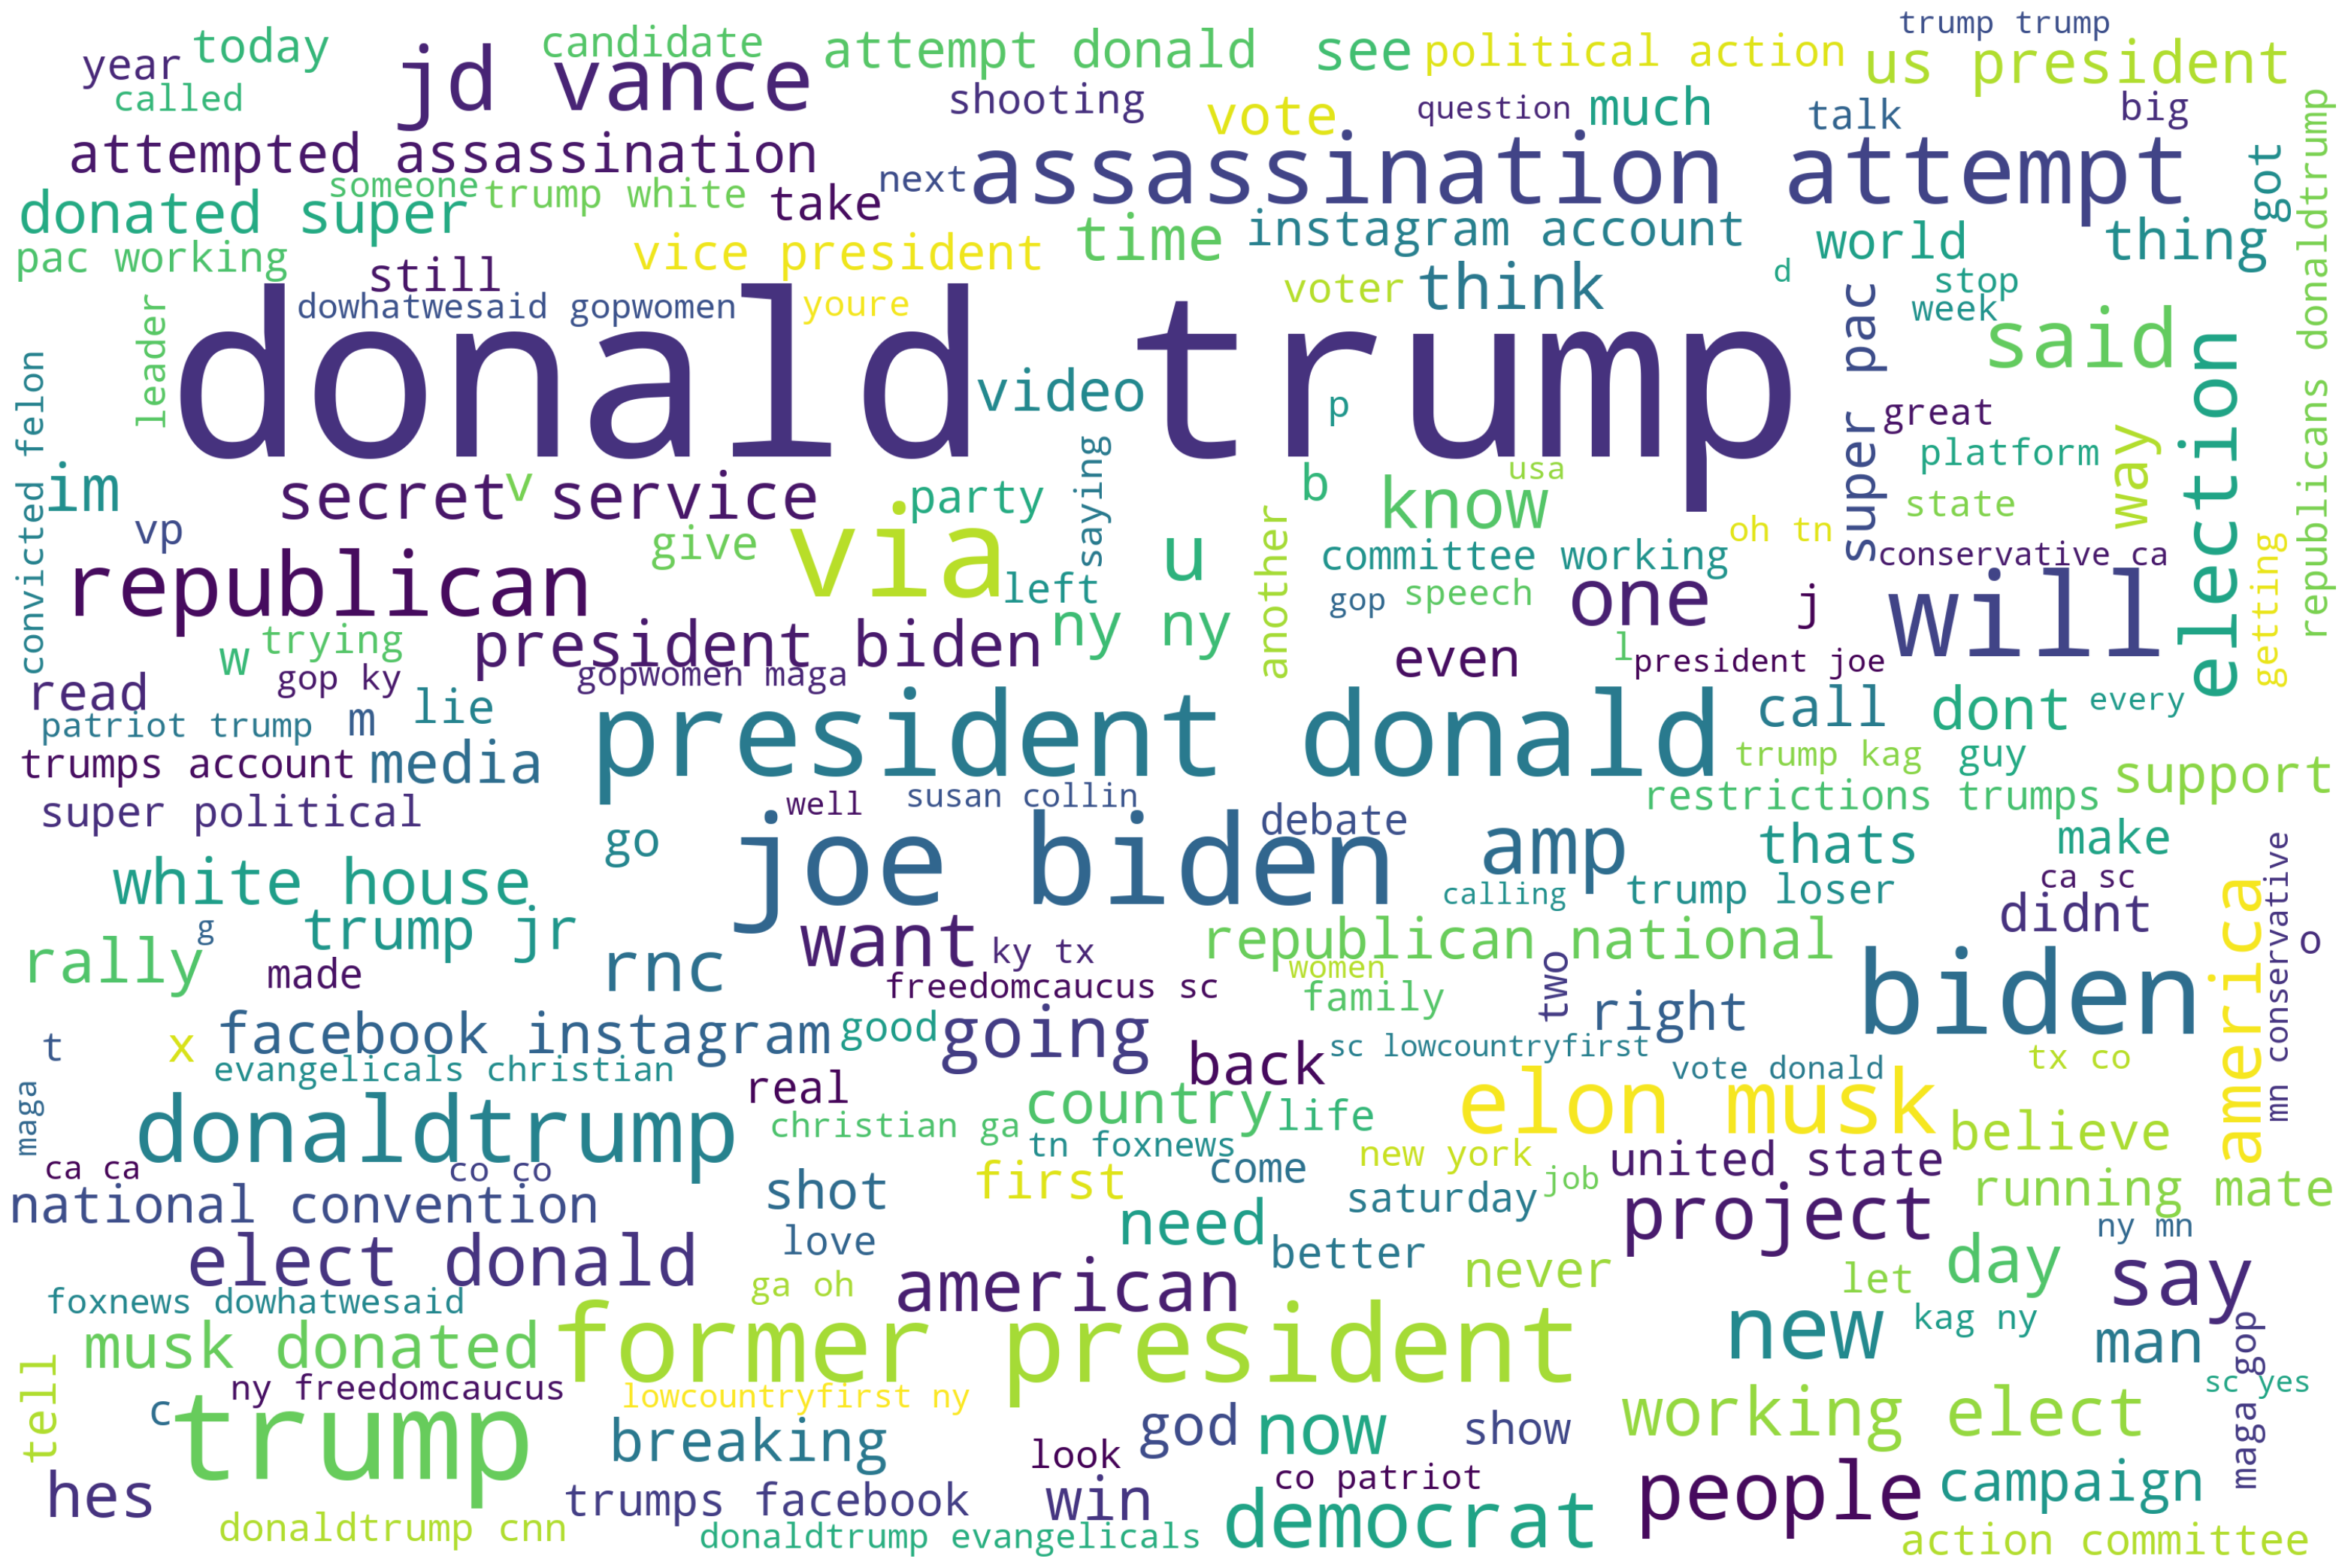

In [231]:
def gen_worldcloud(text, stemming):
    #Create the full list of tweets
    full_tweets = " ".join(tweet for tweet in text[stemming])

    #Changing the width, height, background color and stopwords
    wordcloud = WordCloud(width = 3000, height = 2000,background_color='white')
    #Generate based on our list of tweets
    
    wordcloud.generate(full_tweets)
    
    
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

gen_worldcloud(df_tweets, "text_stemmed_porter")

<Axes: xlabel='overall_sentiment'>

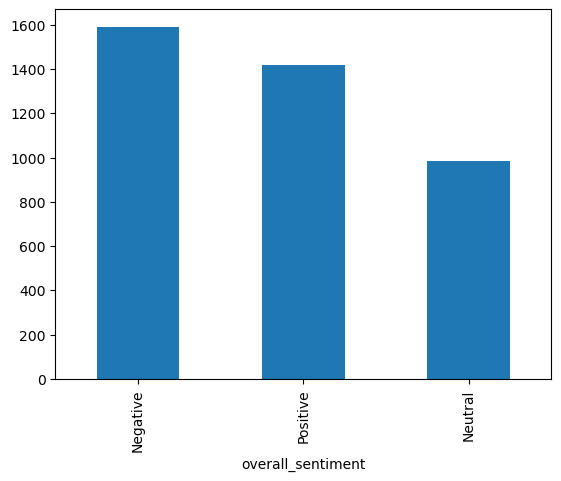

In [232]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(tweets):

    # Create a SentimentIntensityAnalyzer object.
    sid = SentimentIntensityAnalyzer()

    sentiment_dict = sid.polarity_scores(tweets)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"

    return negative, neutral, positive, compound, overall_sentiment

#Implement it on each tweet individually

df_tweets["sentiment_vader"] = df_tweets["text_stemmed_porter"].apply(lambda tweet: sentiment_vader(tweet))

df_vader_sentiments = pd.DataFrame()
df_vader_sentiments[["negative_sentiment", "neutral_sentiment", "positive sentiment", "compound_sentiment", "overall_sentiment"]] = \
    pd.DataFrame(df_tweets['sentiment_vader'].tolist())

#Plot the distribution of positive, negative and neutral graphs
df_vader_sentiments["overall_sentiment"].value_counts().plot.bar()

In [236]:
#plotting of the piechart
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go

df_tweets['overall_sentiments'].value_counts()

# Create dataframe for Count of Sentiment Categories
pie_chart = df_tweets['overall_sentiments'].value_counts().rename_axis('Sentiment').to_frame('Total_Tweets').reset_index()
colors = ['rgb(127,60,141)','rgb(217,204,216)']
sentiments_piechart = go.Figure(data=[go.Pie(labels = pie_chart.Sentiment, values = pie_chart.Total_Tweets,
                                            pull = [0,0.1], textinfo='label+percent',
                                             marker=dict(colors=colors))])
sentiments_piechart.update_layout(title="Viewers' Perception",
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})
sentiments_piechart.show()

In [200]:

from nrclex import NRCLex

#overall sentiment based on all the tweet pulled
full_text = ",".join(df_tweets["text_stemmed_porter"])

nrc_sentiments = NRCLex(full_text).raw_emotion_scores

df_nrc_sentiments = pd.DataFrame.from_dict(nrc_sentiments, orient='index')
df_nrc_sentiments = df_nrc_sentiments.reset_index()
df_nrc_sentiments = df_nrc_sentiments.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
df_nrc_sentiments = df_nrc_sentiments.sort_values(by=['Emotion Count'], ascending=False)

#plotting the Graph
import plotly.express as px
fig = px.bar(df_nrc_sentiments, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

#Calculate sentiment for each tweet
df_tweets["nrclex_sentiments"] = df_tweets["text_stemmed_porter"].apply(lambda tweet: NRCLex(tweet).raw_emotion_scores)

In [203]:
#adding the sentiment classification to the tweets dataframe
df_tweets['overall_sentiments']=df_vader_sentiments['overall_sentiment']

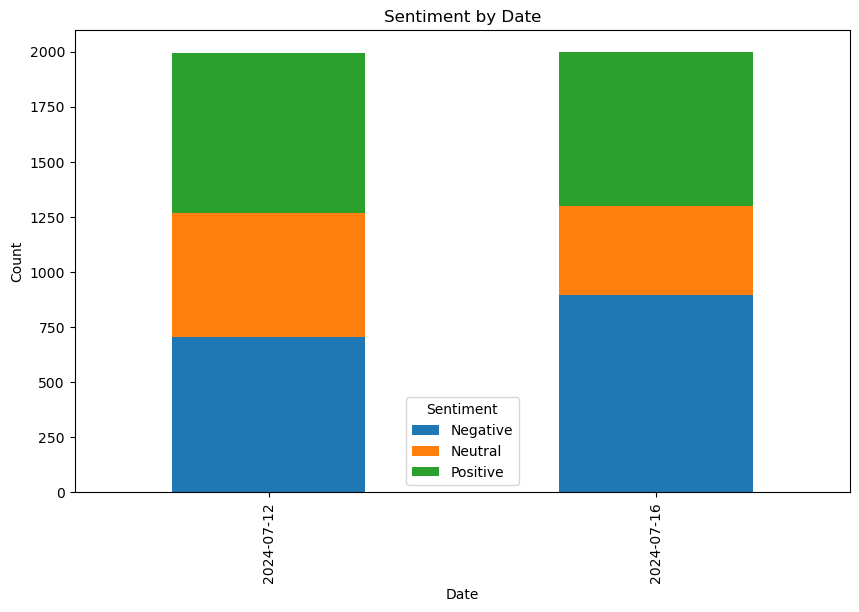

In [175]:
#plotting the barchart to show totalsentiments by days
grouped = df_tweets.groupby(['date', 'overall_sentiments']).size().unstack(fill_value=0)

# Plot the grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment by Date')
plt.legend(title='Sentiment')
plt.show()

In [247]:
#public metrics by overall sentiments
metrics_by_sentiment = df_tweets.groupby('overall_sentiments')[['like_count','retweet_count','reply_count','quote_count']].sum()
likes_by_sentiment

,like_count,retweet_count,impression_count,reply_count,quote_count
overall_sentiments,,,,,
Negative,322029,69782,18601566,38199,4739
Neutral,74698,13615,5386638,6635,1032
Positive,462973,99058,50803566,64931,9908


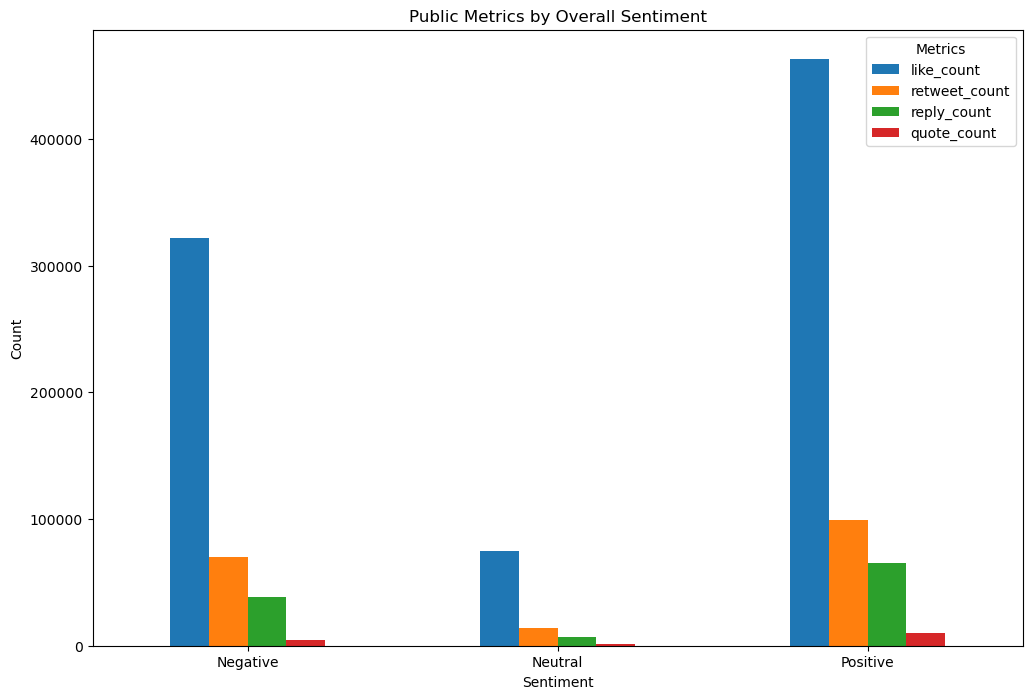

In [248]:
metrics_by_sentiment.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Public Metrics by Overall Sentiment')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.show()

In [264]:
#assessing the complex sentiments before and after the assasination attempt
num_rows_per_split = 1951

# Split the DataFrame
split_dfs = np.array_split(df_tweets, np.ceil(len(df_tweets) / num_rows_per_split))

# Store each split in its own DataFrame and display them
for i, split_df in enumerate(split_dfs):
    globals()[f"df_split_{i+1}"] = split_df
    

from nrclex import NRCLex

#overall sentiment based on all the tweet pulle in
full_text = ",".join(df_split_1["text_stemmed_porter"])

nrc_sentiments = NRCLex(full_text).raw_emotion_scores

df_nrc_sentiments = pd.DataFrame.from_dict(nrc_sentiments, orient='index')
df_nrc_sentiments = df_nrc_sentiments.reset_index()
df_nrc_sentiments = df_nrc_sentiments.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
df_nrc_sentiments = df_nrc_sentiments.sort_values(by=['Emotion Count'], ascending=False)

#plotting the Graph
import plotly.express as px
fig = px.bar(df_nrc_sentiments, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

#Calculate sentiment for each tweet
df_split_1["nrclex_sentiments"] = df_split_1["text_stemmed_porter"].apply(lambda tweet: NRCLex(tweet).raw_emotion_scores)

#overall sentiment based on all the tweet pulle in
full_text = ",".join(df_split_2["text_stemmed_porter"])

nrc_sentiments = NRCLex(full_text).raw_emotion_scores

df_nrc_sentiments = pd.DataFrame.from_dict(nrc_sentiments, orient='index')
df_nrc_sentiments = df_nrc_sentiments.reset_index()
df_nrc_sentiments = df_nrc_sentiments.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
df_nrc_sentiments = df_nrc_sentiments.sort_values(by=['Emotion Count'], ascending=False)

#plotting the Graph
import plotly.express as px
fig = px.bar(df_nrc_sentiments, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

#Calculate sentiment for each tweet
df_split_2["nrclex_sentiments"] = df_split_2["text_stemmed_porter"].apply(lambda tweet: NRCLex(tweet).raw_emotion_scores)